# Artificial Neural Network -- Multilayer Perceptron

Here we use the cancer dataset to learn logistic regression.

## Dataset -- And, Or and XOr

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split


In [2]:
values = np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
data_and = pd.DataFrame(columns=['x1','x2','y'],data=values)
data_and

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
values = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,1]])
data_or = pd.DataFrame(columns=['x1','x2','y'],data=values)
data_or

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [4]:
values = np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
data_xor = pd.DataFrame(columns=['x1','x2','y'],data=values)
data_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


# Logistic Regression
## Model
In order to scale the result between 0 and 1, we use Sigmoid function.


In [5]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    if len(s.shape)==1:
        s = s.reshape(s.shape[0],1)
    return s

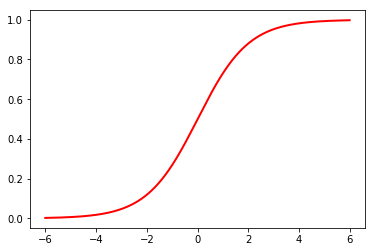

In [6]:
def draw_sigmoid():
    x = np.arange(-6, 6, .01)
    y = sigmoid(x)

    plt.plot(x, y, color='red', lw=2)
    plt.show()

draw_sigmoid()

when we replace z with $\theta x$, we get the model function.

$\hat{y}=\frac{1}{1 + e^{- \theta x}}$

In [7]:
def model(theta, X):
    z = np.sum(theta.T * X, axis=1)
    return sigmoid(z)

## Loss Function

In [8]:
#cross_entropy
def cross_entropy(y, y_hat):
    n_samples = y.shape[0]
    return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/n_samples

def cost_function(theta, X, y):
    y_hat = model(theta, X)
    return cross_entropy(y, y_hat)

## Optimizer

Let us name the lost function as **J**

$J= - y * log(\hat{y}) - (1-y) * log(1-\hat{y})$

So the devivative of J will be:

$\frac{\partial J}{\partial \theta} = - \frac{\partial (y * log(\hat{y}) + (1-y) * log(1-\hat{y}))}{\partial \theta}$

$ = - \frac{\partial (y * log(\hat{y}))}{\partial \theta} - \frac{\partial  ((1-y) * log(1-\hat{y}))}{\partial \theta}$

$ = - y * \frac{\partial log(\hat{y})}{\partial \theta} - (1-y) * \frac{log(1-\hat{y})}{\partial \theta}$

$ = - \frac{y}{\hat{y}} *\frac{\partial \hat{y}}{\partial \theta} - \frac{1-y}{1-\hat{y}} *\frac{\partial (1-\hat{y})}{\partial \theta}$

$ = - \frac{y}{\hat{y}} *\frac{\partial \hat{y}}{\partial \theta} + \frac{1-y}{1-\hat{y}} *\frac{\partial (\hat{y})}{\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \frac{\partial (\hat{y})}{\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \frac{\partial (\frac{1}{1 + e^{- \theta x}})} {\partial a}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) \frac{\partial (1 + e^{- \theta x})} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) \frac{\partial (e^{- \theta x})} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * (- \hat{y} ^ 2) * e^{- \theta x} \frac{\partial (- \theta x)} {\partial \theta}$

$ = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} ^ 2 * e^{- \theta x} * x $

∵  $\hat{y}=\frac{1}{1 + e^{- \theta x}}$ 

∴  $1 + e^{- \theta x}=\frac{1}{\hat{y}}$ 

∴  $e^{- \theta x}=\frac{1}{\hat{y}} - 1$ 

∴  $e^{- \theta x}=\frac{1-\hat{y}}{\hat{y}}$ 

$\frac{\partial J}{\partial \theta} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} ^ 2 * \frac{1-\hat{y}}{\hat{y}} * x$

$\frac{\partial J}{\partial \theta} = (- \frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}} ) * \hat{y} * (1-\hat{y}) * x$

$\frac{\partial J}{\partial \theta} = (- y * (1-\hat{y}) + (1-y) * \hat{y} ) * x$

$\frac{\partial J}{\partial \theta} = (- y + y *\hat{y} + \hat{y}-y * \hat{y} ) * x$

$\frac{\partial J}{\partial \theta} = (\hat{y}-y ) * x$

Thus the optimizer will be:

$\theta = \theta - \alpha * \frac{\partial J}{\partial \theta}$

$\theta = \theta - \alpha * (\hat{y}-y ) * x$

Let us write the code of it.

In [9]:
def optimize(theta,X,y):
    n = X.shape[0]
    n_theta = theta.shape[0]
    alpha = 1e-1

    y_hat = model(theta,X)

    dtheta = (1.0/n) * ((y_hat-y)*X)
    dtheta = np.sum(dtheta, axis=0)
    dtheta=dtheta.reshape((n_theta,1))
    theta = theta - alpha * dtheta
    return theta

## Evaluation
We evaluate the performance of classification algorithms by accuracy. You can also use ROC, recall, precision, F1 score and so on. But here I just use accuracy. Three functions are given. The first calcuate $\hat{y}$, which is a number between 0 and 1. The second function use the result of the first function and 

In [10]:
def predict_proba(theta, X):
    y_hat=model(theta, X)
    return y_hat

def predict(X, theta):
    y_hat=predict_proba(theta,X)
    y_hard=(y_hat > 0.5) * 1
    return y_hard

def accuracy(theta, X, y):
    y_hard=predict(X, theta)
    count_right=sum(y_hard == y)
    return count_right*1.0/len(y)

## Iterations

In [11]:
def lr_iterate(theta,X,y,times):
    costs = []
    accs = []
    for i in range(times):
        theta = optimize(theta,X,y)
        costs.append(cost_function(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, costs, accs

# Using Logistic Regression
## And

In [12]:
X = data_and[['x1','x2']]
y = np.array(data_and['y']).reshape((4,1))
n_features = X.shape[1]

Append ones at the beginning of each row of matrix.

In [13]:
def add_ones(X):
    ones=np.ones((X.shape[0],1))
    X_with_ones=np.hstack((ones, X))
    return X_with_ones

In [14]:
X_with_ones = add_ones(X)

In [15]:
X_with_ones

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

Split Train and test data

In [16]:
theta = np.ones((n_features+1,1))

In [18]:
theta, costs, accs = lr_iterate(theta, X_with_ones, y, 50)

In [19]:
theta

array([[-0.84391555],
       [ 0.53295346],
       [ 0.53295346]])

In [20]:
predict(X_with_ones, theta)

array([[0],
       [0],
       [0],
       [1]])

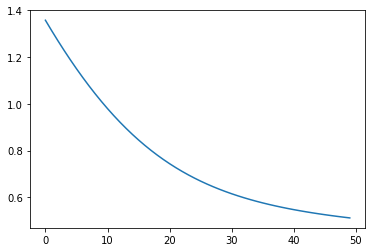

In [21]:
plt.plot(costs)

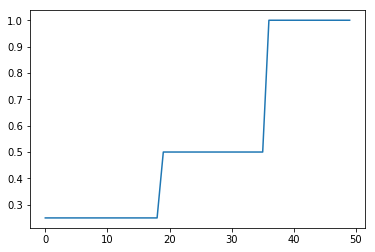

In [22]:
plt.plot(accs)

## Or

In [23]:
X = data_or[['x1','x2']]
y = np.array(data_or['y']).reshape((4,1))
n_features = X.shape[1]

Append ones at the beginning of each row of matrix.

In [24]:
X_with_ones = add_ones(X)

In [25]:
X_with_ones

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

Split Train and test data

In [26]:
theta = np.ones((n_features+1,1))
theta, costs, accs = lr_iterate(theta, X_with_ones, y, 200)

In [27]:
theta

array([[-0.18235687],
       [ 1.9322805 ],
       [ 1.9322805 ]])

In [28]:
predict(X_with_ones, theta)

array([[0],
       [1],
       [1],
       [1]])

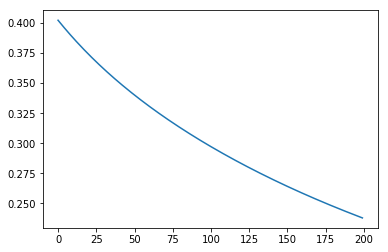

In [29]:
plt.plot(costs)

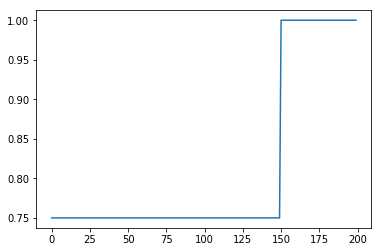

In [30]:
plt.plot(accs)

Apply model to test data.


## XOr

In [31]:
data_xor

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [32]:
X = data_xor[['x1','x2']]
y = np.array(data_xor['y']).reshape((4,1))
n_features = X.shape[1]

Append ones at the beginning of each row of matrix.

In [33]:
def add_ones(X):
    ones=np.ones((X.shape[0],1))
    X_with_ones=np.hstack((ones, X))
    return X_with_ones

In [34]:
X_with_ones = add_ones(X)

In [35]:
X_with_ones

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

Split Train and test data

In [36]:
theta = np.ones((n_features+1,1))
theta, costs, accs = lr_iterate(theta, X_with_ones, y, 1000)

In [37]:
theta

array([[-0.00609355],
       [ 0.00513729],
       [ 0.00513729]])

In [38]:
predict(X_with_ones, theta)

array([[0],
       [0],
       [0],
       [1]])

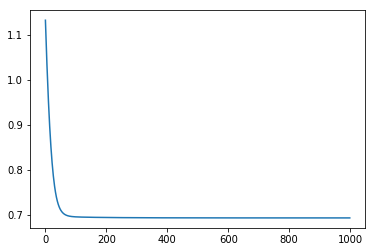

In [39]:
plt.plot(costs)

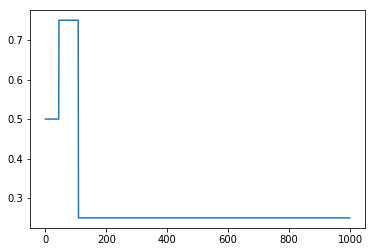

In [40]:
plt.plot(accs)

# Multilayer Perceptron

In [41]:
theta1 = np.random.uniform(size=(3,6))
theta2 = np.random.uniform(size=(6,3))
theta3 = np.random.uniform(size=(3,1))
theta = np.array([theta1, theta2, theta3])
for i, sub_theta in enumerate(theta):
    print(sub_theta)

[[0.64986277 0.33002868 0.34866235 0.1729604  0.88120312 0.35819787]
 [0.86736953 0.88224624 0.08358989 0.52026664 0.9353654  0.27915095]
 [0.59867994 0.99532943 0.84768179 0.67493712 0.56583102 0.38147813]]
[[0.35401488 0.68780947 0.18536698]
 [0.92310327 0.97621627 0.73400983]
 [0.63736489 0.33029443 0.7291721 ]
 [0.11835257 0.6130522  0.80914538]
 [0.99865169 0.69542745 0.58759449]
 [0.04820392 0.73668664 0.13855737]]
[[0.40422817]
 [0.37811913]
 [0.15256673]]


In [42]:
X_with_ones

array([[1., 0., 0.],
       [1., 0., 1.],
       [1., 1., 0.],
       [1., 1., 1.]])

In [43]:
def mlp_model(theta, X):
    n_layers = len(theta)
    layers = [X]
    for i, sub_theta in enumerate(theta):
        #print(i)
        #print(X.shape)
        #print(sub_theta.shape)
        z = np.matmul(X, sub_theta)
        #print("zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz")
        #print(z)
        s = sigmoid(z)
        X = s
        layers.append(X)
    y=X
    return y, layers

In [44]:
mlp_model(theta, X_with_ones)

(array([[0.69744155],
        [0.70522046],
        [0.70436438],
        [0.70836522]]), [array([[1., 0., 0.],
         [1., 0., 1.],
         [1., 1., 0.],
         [1., 1., 1.]]),
  array([[0.65697954, 0.58176635, 0.58629316, 0.54313263, 0.70707148,
          0.58860412],
         [0.7770475 , 0.79007178, 0.76787379, 0.70012591, 0.80954157,
          0.676925  ],
         [0.82013056, 0.77070122, 0.60641135, 0.66668441, 0.86015387,
          0.65415391],
         [0.89244017, 0.90093031, 0.78243855, 0.79708338, 0.9154753 ,
          0.73474404]]),
  array([[0.87457893, 0.9221381 , 0.87133486],
         [0.91817177, 0.95479283, 0.91832852],
         [0.91354521, 0.95282433, 0.90849616],
         [0.93645083, 0.96827291, 0.93595262]]),
  array([[0.69744155],
         [0.70522046],
         [0.70436438],
         [0.70836522]])])

In [45]:
def mlp_optimize(theta,X,y):
    n = X.shape[0]
    n_theta = theta.shape[0]
    alpha = 1e-1

    y_hat, layers = mlp_model(theta,X)
    X_all = layers[:-1]
    Y_all = layers[1:]
    for X, Y in zip(X_all, Y_all):
        dtheta = (1.0/n) * ((y_hat-y)*X)
        dtheta = np.sum(dtheta, axis=0)
        dtheta = dtheta.reshape((n_theta,1))
        theta = theta - alpha * dtheta
    return theta

# Use sklearn

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = data_xor[['x1','x2']]
y = np.array(data_xor['y']).reshape((4,1))

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=2000, alpha=0.01, activation='relu')
mlp.fit(X, y)

In [ ]:
mlp.score(X,y)

In [ ]:
mlp.predict(X)

In [ ]:
y